# Forecasting
Time series forecasting is a technique for the prediction of events through a sequence of time. The technique is used across many fields of study, from the geology to behavior to economics. The techniques predict future events by analyzing the trends of the past, on the assumption that future trends will hold similar to historical trends.

# Interest over Time

In [2]:
# Since pytrends is returning a DataFrame object, we need pandas:
import pandas as pd
# Import of pytrends (needs to be pip installed first):
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=480)

In [4]:
kw_list = ['spice girls','backstreet boys']
pytrends.build_payload(kw_list=kw_list,cat=0,timeframe='2022-07-01 2022-07-30',geo='PH', gprop='')
df = pytrends.interest_over_time()
df

,spice girls,backstreet boys,isPartial
date,,,
2022-07-01,17,51,False
2022-07-02,56,65,False
2022-07-03,29,10,False
2022-07-04,24,41,False
2022-07-05,16,24,False
2022-07-06,16,49,False
2022-07-07,32,16,False
2022-07-08,17,67,False
2022-07-09,28,100,False


# darts

https://unit8.com/resources/darts-time-series-made-easy-in-python/

In [5]:
import pandas as pd
from darts import TimeSeries


series = TimeSeries.from_times_and_values(df['spice girls'].index, df['spice girls'].values)



In [6]:
series

<TimeSeries (DataArray) (date: 30, component: 1, sample: 1)>
array([[[17.]],

       [[56.]],

       [[29.]],

       [[24.]],

       [[16.]],

       [[16.]],

       [[32.]],

       [[17.]],

       [[28.]],

       [[ 9.]],

...

       [[41.]],

       [[17.]],

       [[56.]],

       [[48.]],

       [[35.]],

       [[ 9.]],

       [[18.]],

       [[18.]],

       [[18.]],

       [[40.]]])
Coordinates:
  * date       (date) datetime64[ns] 2022-07-01 2022-07-02 ... 2022-07-30
  * component  (component) <U1 '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [7]:
from darts.models import ExponentialSmoothing
train, val = series.split_before(pd.Timestamp('20220725'))

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))


In [8]:
# Let's try a different model

In [9]:
from darts.models import AutoARIMA

model_aarima = AutoARIMA()
 
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))


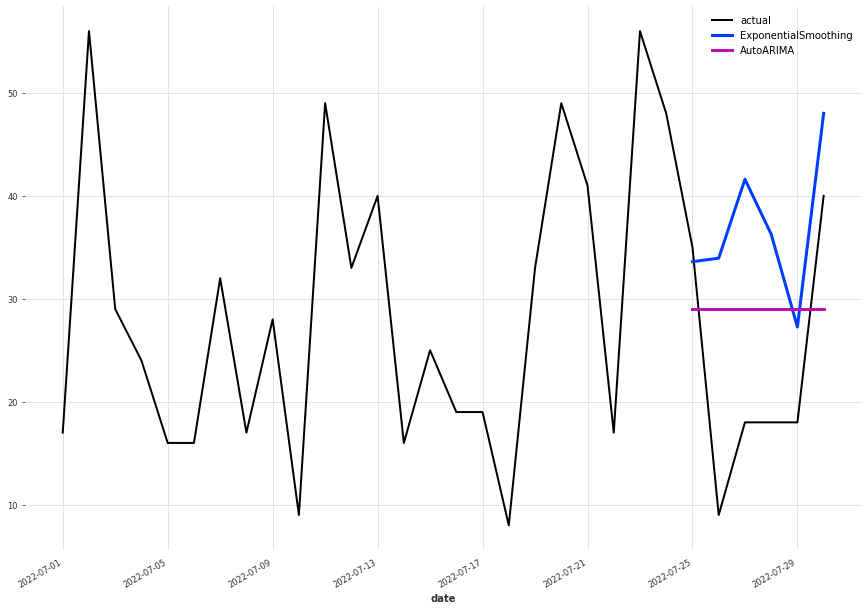

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
series.plot(label='actual')
prediction.plot(label='ExponentialSmoothing', lw=3)
prediction_aarima.plot(label='AutoARIMA', lw=3)

plt.legend()

# evaluation

In [11]:
from darts.metrics import mape

err = mape(model.historical_forecasts(series,
                            start=.5,
                            forecast_horizon=3), series)
print("MAPE: ",err)

err_aarima = mape(model_aarima.historical_forecasts(series,
                            start=.5,
                            forecast_horizon=3), series)
print("MAPE_aarima: ",err_aarima)

MAPE:  60.79901694688574
MAPE_aarima:  53.31772926774385
